In [2]:
import pandas as pd

In [3]:
teams=pd.read_csv("teams.csv")

In [4]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [5]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]

In [6]:
teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [7]:
teams.corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

# Here pre_medals and athletes are closely correlated to the medal

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

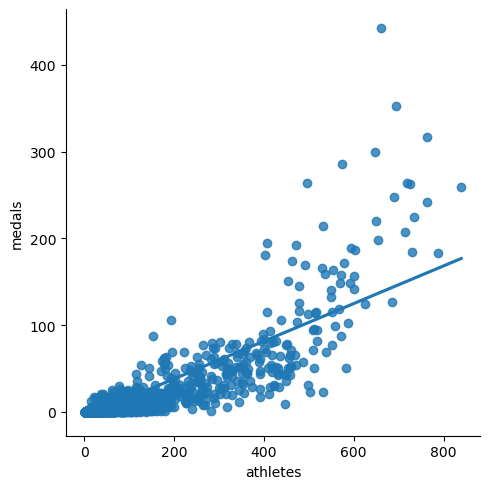

In [9]:
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True,ci=None)
# plt.show()

In [10]:
plt.show()

In [11]:
sns.lmplot(x="age",y="medals",data=teams,fit_reg=True,ci=None)

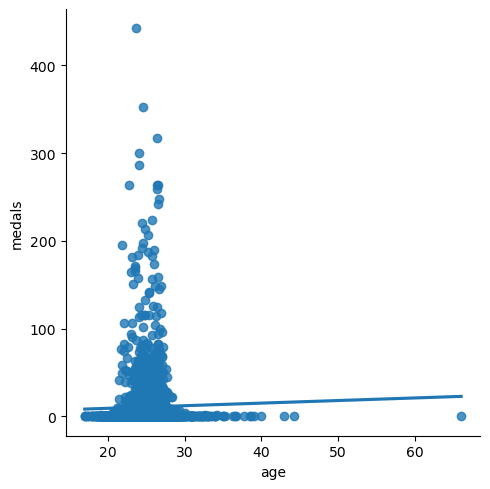

In [12]:
plt.show()


This isn't a better correlation for prediction

In [13]:
teams.plot.hist(y="medals")

<AxesSubplot:ylabel='Frequency'>

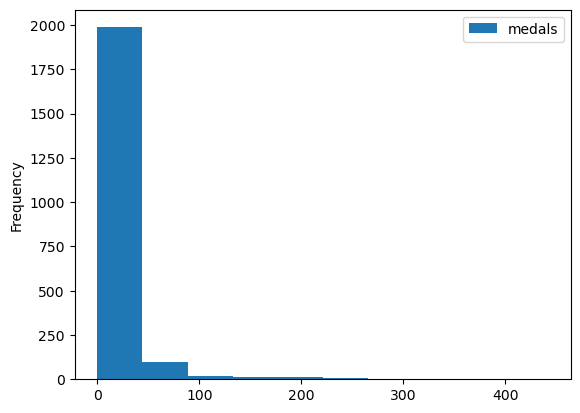

In [14]:
plt.show()

In [15]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [16]:
teams=teams.dropna()

In [17]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


Now we will split our data, from 2012-16 will use for testing

In [18]:
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [19]:
train.shape

(1609, 7)

In [20]:
test.shape

(405, 7)

In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [22]:
predictors=["athletes","prev_medals"]
target="medals"

In [23]:
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [24]:
predictions=reg.predict(test[predictors])

In [25]:
#inserting a new column named prediction in our dataframe of test
test["predictions"]=predictions

In [26]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [27]:
test.loc[test["predictions"]<0,"predictions"]=0

In [28]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [29]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test["medals"],test["predictions"])

In [30]:
error

3.297199341616983

In [31]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [32]:
test[test["team"]=="USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.210121
2054,USA,United States,2016,719,26.4,248.0,264,235.568076


In [33]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,6.921667
908,IND,India,2016,130,26.1,6.0,2,11.683176


In [34]:
teams.loc[908]

team             IND
country        India
year            2016
athletes         130
age             26.1
prev_medals      6.0
medals             2
Name: 908, dtype: object

In [35]:
errors=(test["medals"]-test["predictions"]).abs()

In [36]:
error_by_team=errors.groupby(test["team"]).mean()

In [38]:
error_by_team

team
AFG    0.500000
ALB    0.000000
ALG    1.535133
AND    0.000000
ANG    0.183782
         ...   
VIE    1.164723
VIN    0.000000
YEM    0.000000
ZAM    0.000000
ZIM    0.793257
Length: 204, dtype: float64

In [43]:
medals_by_team=test["medals"].groupby(test["team"]).mean()

In [44]:
error_ratio=error_by_team/medals_by_team

In [45]:
error_ratio

team
AFG    1.000000
ALB         NaN
ALG    1.023422
AND         NaN
ANG         inf
         ...   
VIE    1.164723
VIN         NaN
YEM         NaN
ZAM         NaN
ZIM         inf
Length: 204, dtype: float64

In [47]:
import numpy as np
error_ratio=error_ratio[np.isfinite(error_ratio)]

In [48]:
error_ratio

team
AFG    1.000000
ALG    1.023422
ARG    0.841636
ARM    0.433824
AUS    0.362901
         ...   
UKR    0.946412
USA    0.128207
UZB    0.658187
VEN    1.710208
VIE    1.164723
Length: 97, dtype: float64

In [49]:
error_ratio.plot.hist()

<AxesSubplot:ylabel='Frequency'>

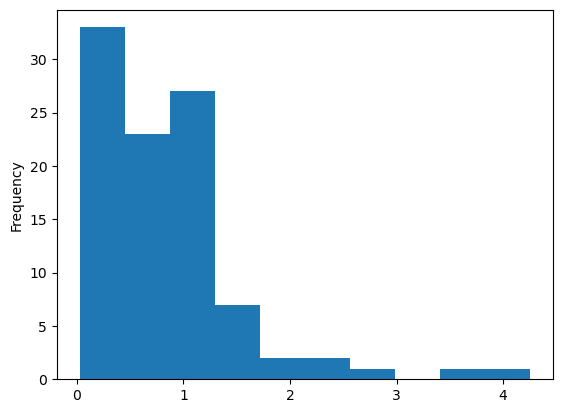

In [50]:
plt.show()